In [1]:
# Mapas de Climate Action Tracker, evaluación de NDCs

import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors

import geopandas as gpd

import plotly.express as px
from PIL import Image

In [3]:
# Datos

# Carpetas
path_r = "../share/Indexes/"
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
path_v = "../data/variables.csv"
map_d = "../../Bases_de_datos/Mapas/"
data_d = "../results/"
wb_path = "../../Bases_de_datos/World_Bank_CCKP/"

# Mapas
map_f = "Natural_Earth/ne_50m_admin_0_countries_mod"

# Códigos nacionales y subnacionales
ix  = "ISO_A3"

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

# Nombres de índices
index_n = [
    "Climate change risk index",
    "Climate change exposure index",
    "Social vulnerability index, physical climate impacts",
    "Social vulnerability index, climate transition impacts",
    "Sea level rise exposure index",
    "Drought exposure index",
    "Extreme heat exposure index",
    "Extreme rainfall exposure index",
    "Hurricane exposure index",
    "Life expectancy at birth index", "log GNI per capita, PPP index",
    "Gender Development index index", "% rural population index",
    "% population below 15 or above 65 years old index",
    "Gini index", "Mean years of schooling index",
    "Scientific articles per million inhabitants index",
    "Young workforce ratio (20-44 to 45-64 years old) index",
    "Gender inequality index index", "Total debt service [% of GNI] index",
    "Central government debt [% of GDP] index", "Gini index index"]
climate = index_n[1:2] + index_n[3:8]
social = index_n[2:3] + index_n[8:13]

# Catálogo de datos
df_catalog = pd.read_csv(path_catalog)

# Índices climáticos y socioeconómicos
df_c = pd.read_csv(
    f"{path_r}climate_index.csv", index_col = ix)
df_s = pd.read_csv(
    f"{path_r}Physical_vulnerability_index.csv", index_col = ix)
df_t = pd.read_csv(
    f"{path_r}Transition_vulnerability_index.csv", index_col = ix)
df_r = pd.read_csv(
    f"{path_r}climate_risk_index.csv", index_col = ix)

# Variables utilizadas para el índicador de resiliencia
df_v = pd.read_csv(path_v)

# Mapas
gdf_2 = gpd.read_file( map_d + map_f ).set_index( "GU_A3" ).drop(columns = ix)
gdf_2.index.name = ix

# Cargamos datos
id = "CAT_Assessment"
df_cat = pd.read_csv( "../../"
    + df_catalog.loc[df_catalog["ID"]==id, "Path"].iloc[0]
    + df_catalog.loc[df_catalog["ID"]==id, "Filename" ].iloc[0],
    index_col = "alpha-3" )
df_cat["alpha-2"] = df_iso["alpha-2"]
df_cat.loc["-99", "alpha-2"] = "EU"
df_cat.head()

Country           Overall rating  Policies and action  \
alpha-3                                                            
ARG      Argentina  Critically insufficient  Highly insufficient   
AUS      Australia             Insufficient         Insufficient   
BTN         Bhutan        Almost Sufficient     1.5°C compatible   
BRA         Brazil             Insufficient         Insufficient   
CAN         Canada      Highly insufficient  Highly insufficient   

        Domestic or supported target        Fair share target  \
alpha-3                                                         
ARG              Highly insufficient  Critically insufficient   
AUS                Almost Sufficient             Insufficient   
BTN          1.5°C global least cost        Almost Sufficient   
BRA                Almost Sufficient        Almost Sufficient   
CAN                Almost Sufficient             Insufficient   

                 Climate finance         Net zero target Update date  \
alpha-3                                                                
ARG                 Not assessed                    Poor      oct-23   
AUS      Critically insufficient                    Poor    Dec 2023   
BTN               Not applicable  Information incomplete      jul-23   
BRA               Not applicable                    Poor    Aug 2024   
CAN          Highly insufficient                 Average    Dec 2022   

        % of global emissions (Worldometer) alpha-2  
alpha-3                                              
ARG                                   0.48%      AR  
AUS                                   1.02%      AU  
BTN                                   0.00%      BT  
BRA                                   1.21%      BR  
CAN                                   1.51%      CA

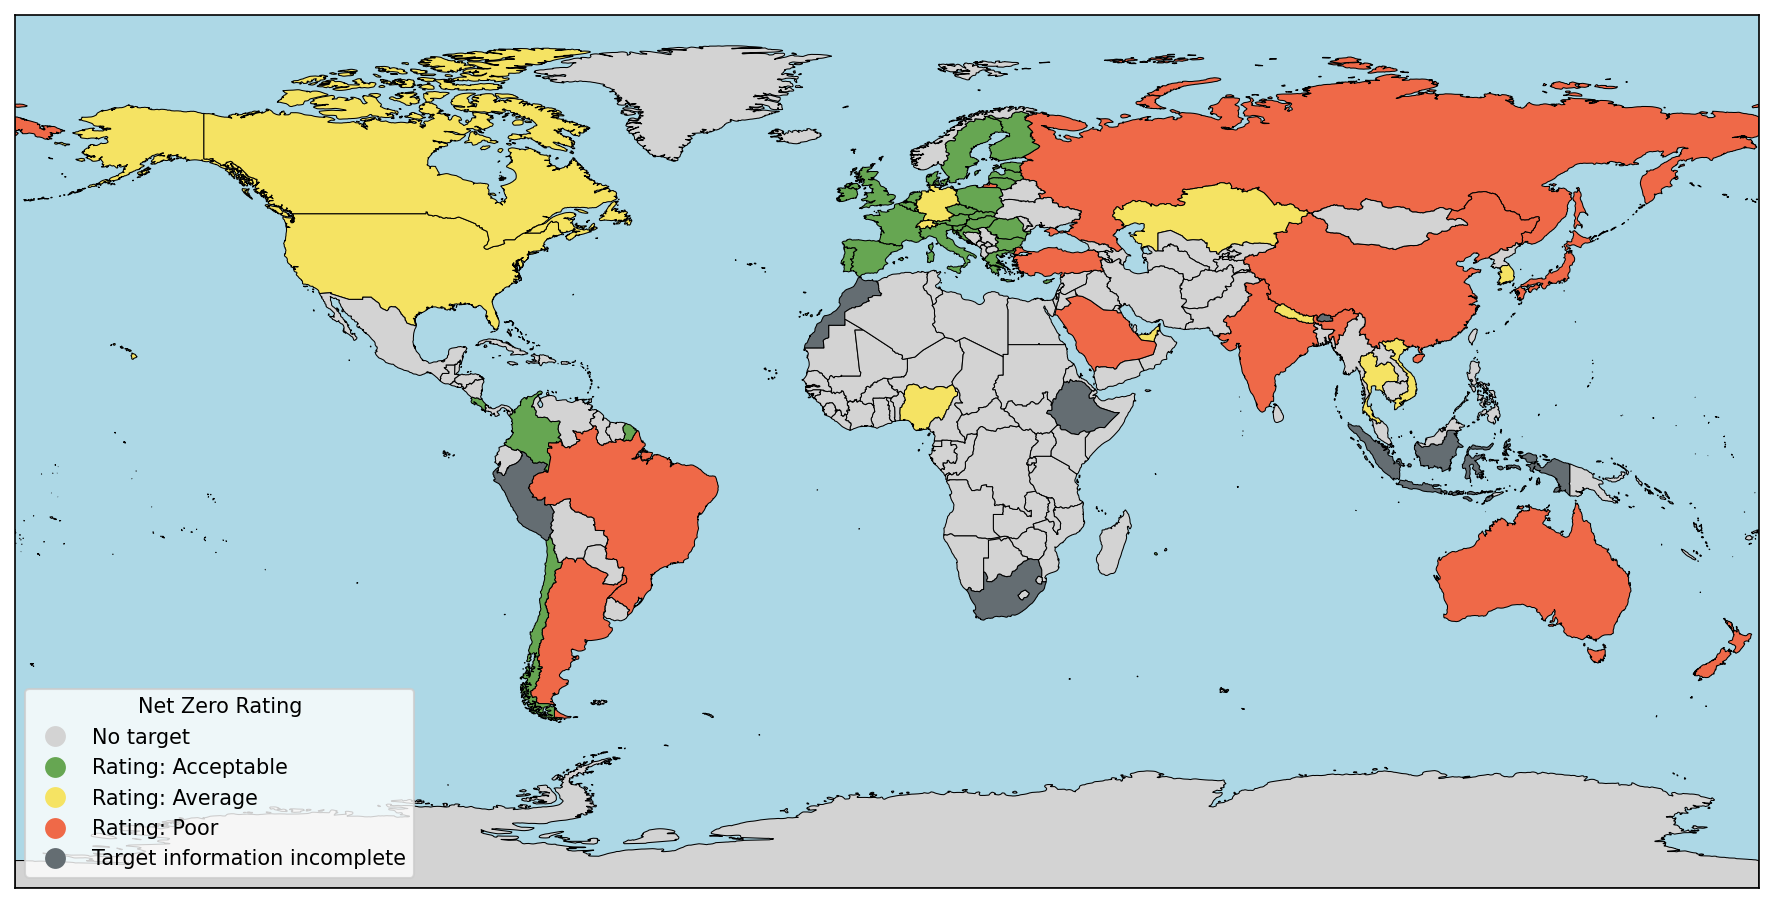

In [4]:
# Gráfica de Climate Action Tracker Net Zero Rating

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(15, 15)
fig.set_dpi(150) 


# Cambiamos los nombres para que estén ordenados alfabéticamente.
gdf_2["Net Zero Rating"] = df_cat["Net zero target"]
gdf_2.loc[["AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "SWE",
    "FIN", "FRA", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT",
    "NLD", "POL", "PRT", "ROU", "SVK", "SVN", "ESP"],
    "Net Zero Rating"] = "Acceptable"
gdf_2["Net Zero Rating"] = gdf_2["Net Zero Rating"].fillna( "No target"
    ).replace( { "Information incomplete": "Target information incomplete",
    "Acceptable": "Rating: Acceptable", "Average": "Rating: Average",
    "Poor": "Rating: Poor" } )

# Establecemos los colores 
color_dict = {
    "No Target": "lightgrey", "Rating: Acceptable": "#66a652",
    "Rating: Average": "#f5e363", "Rating: Poor": "#ef6948", 
    "Target information incomplete": "#646d72",
    }

# Graficamos Net Zero Rating
gdf_2.plot( ax = ax, column = gdf_2["Net Zero Rating"],
    cmap = colors.ListedColormap(list(color_dict.values())),
    edgecolor = "black", linewidth = 0.5, legend = True,
    legend_kwds = {"title": "Net Zero Rating", "loc": "lower left"} ) 

# Ajustes de visualización
#ax.axis('off')
ax.margins(0)
ax.tick_params( left = False, labelleft = False,
    bottom = False, labelbottom = False )
ax.set_facecolor("lightblue")
ax.set_ylim(-90, 90)

fig.savefig("../graphs/Net_Zero_Rating.svg")

plt.show()

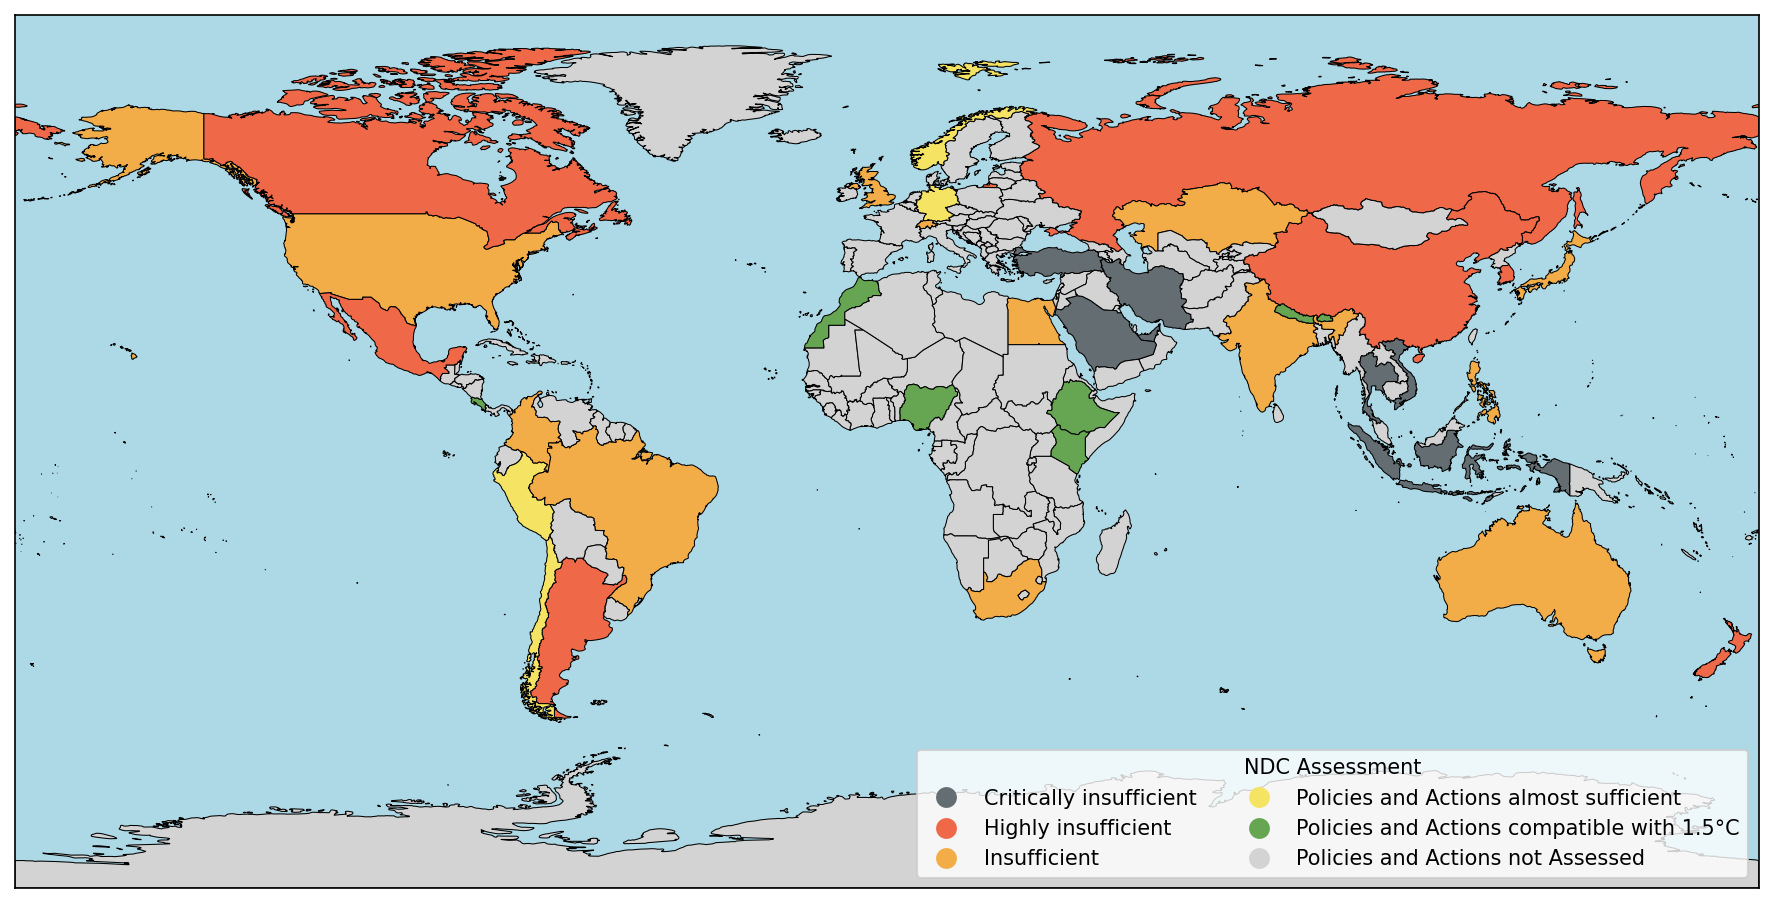

In [5]:
# Gráfica de Climate Action Tracker Net Zero Rating

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(15, 15)
fig.set_dpi(150) 

gdf_2["NDC Assessment"] = df_cat["Policies and action"]
gdf_2.loc[["AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "SWE",
    "FIN", "FRA", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT",
    "NLD", "POL", "PRT", "ROU", "SVK", "SVN", "ESP"],
    "Net Zero Rating"] = "Insufficient"

# Cambiamos los nombres para que estén ordenados alfabéticamente.
gdf_2["NDC Assessment"] = gdf_2["NDC Assessment"].fillna(
    "Policies and Actions not Assessed" ).replace( {
    "Almost Sufficient": "Policies and Actions almost sufficient",
    "1.5°C compatible": "Policies and Actions compatible with 1.5°C",
} )

# Establecemos los colores 
color_dict = {
    "Critically insufficient": "#646d72", "Highly insufficient": "#ef6948",
    "Insufficient": "#f2ad48",
    "Policies and Actions almost sufficient": "#f5e363",
    "Paris Agreement compatible with 1.5°C": "#66a652",
    "Not Assessed": "lightgray"
    }

# Graficamos Net Zero Rating
gdf_2.plot( ax = ax, column = gdf_2["NDC Assessment"],
    cmap = colors.ListedColormap(list(color_dict.values())),
    edgecolor = "black", linewidth = 0.5, legend = True,
    legend_kwds = {"title": "NDC Assessment", "loc": "lower right", "ncol": 2} ) 

# Ajustes de visualización
#ax.axis('off')
ax.margins(0)
ax.tick_params( left = False, labelleft = False,
    bottom = False, labelbottom = False )
ax.set_facecolor("lightblue")
ax.set_ylim(-90, 90)

fig.savefig("../graphs/NDC_assessment.svg")

plt.show()

In [6]:
# Funciones para transformar evaluación de NDC en número

ndc_n = ["Critically insufficient", "Highly insufficient",
    "Insufficient", "Almost Sufficient", "1.5°C compatible"]
def cat_ndc(x):
    if   x == ndc_n[0]: y = 0
    elif x == ndc_n[1]: y = 1
    elif x == ndc_n[2]: y = 2
    elif x == ndc_n[3]: y = 3
    elif x == ndc_n[4]: y = 4
    return y

net_n = ["Information incomplete", "Poor", "Average", "Acceptable"]
def cat_net(x):
    if   x == net_n[0]: y = 0
    elif x == net_n[1]: y = 1
    elif x == net_n[2]: y = 2
    elif x == net_n[3]: y = 3
    else: y = np.nan
    return y

df_cat["Policies and action_N"] = df_cat["Policies and action"].apply(cat_ndc)
df_cat["Net zero target_N"] = df_cat["Net zero target"].apply(cat_net)
df_cat[index_n[1]] = df_c[index_n[1]]
df_cat[index_n[2]] = df_s[index_n[2]]
df_cat[index_n[3]] = df_t[index_n[3]]

df_cat.loc["-99", index_n[1]] = df_c.loc[
    df_iso[ df_iso["EU27"] ].drop("DEU").index, index_n[1] ].mean()
df_cat.loc["-99", index_n[2]] = df_s.loc[
    df_iso[ df_iso["EU27"] ].drop("DEU").index, index_n[2] ].mean()
df_cat.loc["-99", index_n[3]] = df_t.loc[
    df_iso[ df_iso["EU27"] ].drop("DEU").index, index_n[3] ].mean()

In [23]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Policies and action_N"
i = 1
df_plot = df_cat[(df_cat[vn].notnull())].copy()
df_plot[ix] = df_plot.index

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn, hover_name = "Country",
    labels = { vn: "" }, hover_data = [ix] )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Iteramos para cada país
for j, row in df_plot.iterrows():
    # Agregamos la bandera de cada país
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )
    
    # Agregamos el código de cada país
    dy = 0.3
    dx = 0
    if j == "-99": j = "EU"
    if j in ["CHE", "NZL", "ARE", "MAR"]: dy *= -1
    if j in ["TUR"]: dy = 0; dx = -0.25
    if j in ["BRA", "KEN"]: dy = 0; dx = 0.25
    fig.add_annotation( x = row[index_n[i]] + dx, y = row[vn] + dy,
        text = j, showarrow = False, font = dict(size = 10) )

# Ajustes de visualización
fig.update_layout(  title = "NDC Assessment", height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf",  margin = dict( l = 20, r = 20, t = 50, b = 20),
    xaxis_range=[1,10.2], yaxis_range=[-0.45,4.45],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 5),
    ticktext = ndc_n ) )

fig.write_image("../graphs/NDC_climate.svg")
fig.write_image("../graphs/NDC_climate.pdf")
fig.write_image("../graphs/NDC_climate.png", scale = 10)
fig.show()

In [22]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Policies and action_N"
i = 2
df_plot = df_cat[(df_cat[vn].notnull())].copy()
df_plot[ix] = df_plot.index

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn, hover_name = "Country",
    labels = { vn: "" }, hover_data = [ix] )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Iteramos para cada país
for j, row in df_plot.iterrows():
    # Agregamos la bandera de cada país
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )
    
    # Agregamos el código de cada país
    dy = 0.3
    dx = 0
    if j == "-99": j = "EU"
    if j in ["RUS", "CAN", "NZL", "CHE", "COL",
        "GBR", "ZAF", "EGY", "KEN", "ETH"]: dy *= -1
    fig.add_annotation( x = row[index_n[i]] + dx, y = row[vn] + dy,
        text = j, showarrow = False, font = dict(size = 10) )

# Ajustes de visualización
fig.update_layout(  height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf",  margin = dict( l = 20, r = 20, t = 10, b = 20),
    xaxis_range=[0.75,9], yaxis_range=[-0.45,4.45],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 5),
    ticktext = ndc_n ) )

fig.write_image("../graphs/NDC_social.svg")
fig.write_image("../graphs/NDC_social.pdf")
fig.write_image("../graphs/NDC_social.png", scale = 10)
fig.show()

In [21]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Policies and action_N"
i = 3
df_plot = df_cat[(df_cat[vn].notnull())].copy()
df_plot[ix] = df_plot.index

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn, hover_name = "Country",
    labels = { vn: "" }, hover_data = [ix] )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Iteramos para cada país
for j, row in df_plot.iterrows():
    # Agregamos la bandera de cada país
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )
    
    # Agregamos el código de cada país
    dy = 0.3
    dx = 0
    if j == "-99": j = "EU"
    if j in ["VNM", "KOR", "SGP", "EGY", "COL", "NGA"]: dy *= -1
    if j in ["USA"]: dy = 0; dx = -0.25
    if j in ["IDN"]: dy = 0; dx = 0.25
    fig.add_annotation( x = row[index_n[i]] + dx, y = row[vn] + dy,
        text = j, showarrow = False, font = dict(size = 10) )

# Ajustes de visualización
fig.update_layout( height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf",  margin = dict( l = 20, r = 20, t = 10, b = 20),
    xaxis_range=[-0.25,8.15], yaxis_range=[-0.45,4.45],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 5),
    ticktext = ndc_n ) )

fig.write_image("../graphs/NDC_transition.svg")
fig.write_image("../graphs/NDC_transition.pdf")
fig.write_image("../graphs/NDC_transition.png", scale = 10)
fig.show()

In [20]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Net zero target_N"
i = 1
df_plot = df_cat[(df_cat[vn].notnull())].copy()
df_plot[ix] = df_plot.index

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn, hover_name = "Country",
    labels = { vn: "" }, hover_data = [ix] )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Iteramos para cada país
for j, row in df_plot.iterrows():
    # Agregamos la bandera de cada país
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )
    
    # Agregamos el código de cada país
    dy = 0.3
    dx = 0
    if j == "-99": j = "EU"
    if j in ["PER", "ETH", "NZL", "AUS", "CAN",
        "KAZ", "ARE", "VNM", "CHL"]: dy *= -1
    fig.add_annotation( x = row[index_n[i]] + dx, y = row[vn] + dy,
        text = j, showarrow = False, font = dict(size = 10) )

# Ajustes de visualización
fig.update_layout( title = "Net Zero Rating", height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf", margin = dict( l = 20, r = 20, t = 50, b = 20),
    xaxis_range = [1,10.25], yaxis_range = [-0.45,3.45],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 4),
    ticktext = net_n ) )

fig.write_image("../graphs/Net_Zero_climate.svg")
fig.write_image("../graphs/Net_Zero_climate.pdf")
fig.write_image("../graphs/Net_Zero_climate.png", scale = 10)
fig.show()

In [19]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Net zero target_N"
i = 2
df_plot = df_cat[(df_cat[vn].notnull())].copy()
df_plot[ix] = df_plot.index

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn, hover_name = "Country",
    labels = { vn: "" }, hover_data = [ix])
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Iteramos para cada país
for j, row in df_plot.iterrows():
    # Agregamos la bandera de cada país
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )
    
    # Agregamos el código de cada país
    dy = 0.3
    dx = 0
    if j == "-99": j = "EU"
    if j in ["CAN", "SAU", "MAR", "ZAF", "CHL", "EU", "RUS"]: dy *= -1
    if j in ["AUS", "USA"]: dy = 0; dx = -0.3
    if j in ["GBR", "CHN"]: dy = 0; dx = 0.3
    if j in ["ARG"]: dy *= -1; dx = 0.15
    if j in ["TUR", "NZL"]: dx = 0.15
    fig.add_annotation( x = row[index_n[i]] + dx, y = row[vn] + dy,
        text = j, showarrow = False, font = dict(size = 10) )

# Ajustes de visualización
fig.update_layout( height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf", margin = dict( l = 20, r = 20, t = 10, b = 20),
    xaxis_range = [0.75,9], yaxis_range = [-0.45,3.45],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 4),
    ticktext = net_n ) )

fig.write_image("../graphs/Net_Zero_social.svg")
fig.write_image("../graphs/Net_Zero_social.pdf")
fig.write_image("../graphs/Net_Zero_social.png", scale = 10)
fig.show()

In [18]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Net zero target_N"
i = 3
df_plot = df_cat[(df_cat[vn].notnull())].copy()
df_plot[ix] = df_plot.index

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn, hover_name = "Country",
    labels = { vn: "" }, hover_data = [ix] )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Iteramos para cada país
for j, row in df_plot.iterrows():
    # Agregamos la bandera de cada país
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )
    
    # Agregamos el código de cada país
    dy = 0.3
    dx = 0
    if j == "-99": j = "EU"
    if j in ["CAN", "KAZ", "THA", "SAU", "MAR", "ETH"]: dy *= -1
    if j in ["ARG"]: dy = 0; dx = 0.3
    if j in ["CHN"]: dy *= -1; dx = 0.15
    fig.add_annotation( x = row[index_n[i]] + dx, y = row[vn] + dy,
        text = j, showarrow = False, font = dict(size = 10) )

# Ajustes de visualización
fig.update_layout( height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf", margin = dict( l = 20, r = 20, t = 10, b = 20),
    xaxis_range = [-0.25,8.15], yaxis_range = [-0.45,3.45],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 4),
    ticktext = net_n ) )

fig.write_image("../graphs/Net_Zero_transition.svg")
fig.write_image("../graphs/Net_Zero_transition.pdf")
fig.write_image("../graphs/Net_Zero_transition.png", scale = 10)
fig.show()